# Generating feature stacks
Oclrf uses feature stacks for pixel classification. Feature stacks are lists of images of the same size (2D or 3D). You can generate them yourself using any library. However, to get the best performance out, it is recommended to use [pyclesperanto](https://github.com/clEsperanto/pyclesperanto_prototype) because also the prediction uses it. Thus, by using it for feature stack generation and prediction, there is no need for converting or transferring image data. Furthermore, oclrfc brings a utility function for generating feature stacks. It takes an image and a feature specification string as input to produce a feature stack.

Let's start with loading an example image and making a convenience function for visualization:

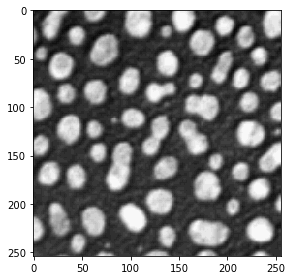

In [1]:
from skimage.io import imread, imshow
image = imread('blobs.tif')
imshow(image)

In [2]:
def visualize(feature_stack):
    # show feature images
    import matplotlib.pyplot as plt
    fig, axes = plt.subplots(1, len(feature_stack), figsize=(10,10))

    # reshape(image.shape) is the opposite of ravel() here. We just need it for visualization.
    for i, f in enumerate(feature_stack):
        axes[i].imshow(f, cmap=plt.cm.gray)

## Feature stacks
A feature stack is a list of 2D or 3D images, typically derived from an original image. If you don't specify any feature specfication, a stack will be generated with the original image, a blurred version and an edge image:

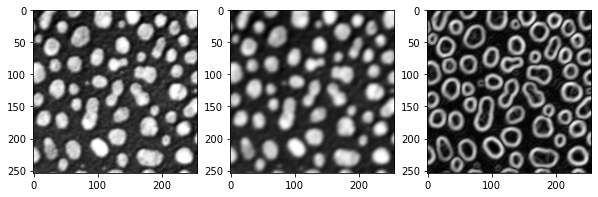

In [3]:
import oclrfc

feature_stack = oclrfc.generate_feature_stack(image)

visualize(feature_stack)

You can furthermore, define specific features corresponding to [clesperanto filters](https://clij.github.io/clij2-docs/reference__pyclesperanto):

generated features:  ['gaussian_blur=3.0', 'mean_box=3.0', 'top_hat_box=3.0']


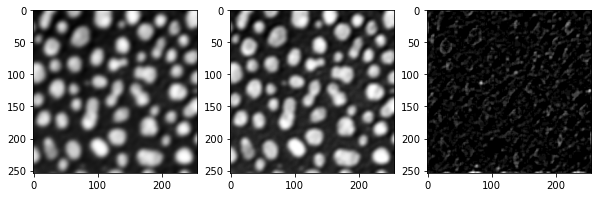

In [4]:
feature_stack = oclrfc.generate_feature_stack(image, "gaussian_blur=3 mean_box=3 top_hat_box=3")

visualize(feature_stack)

generated features:  ['maximum_box=3.0', 'difference_of_gaussian=5.0', 'sobel=0.0']


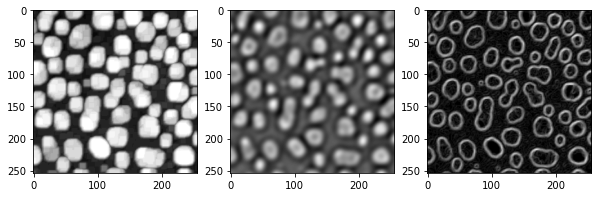

In [5]:
feature_stack = oclrfc.generate_feature_stack(image, " maximum_box=3 difference_of_gaussian=5 sobel=0")

visualize(feature_stack)

You can also vary radii / sigmas of the fetures:

generated features:  ['gaussian_blur=1.0', 'gaussian_blur=5.0', 'gaussian_blur=10.0', 'gaussian_blur=20.0']


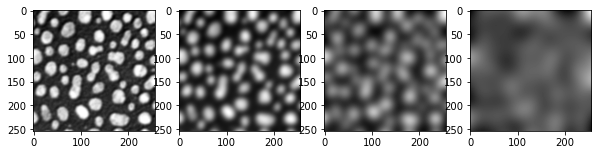

In [6]:
feature_stack = oclrfc.generate_feature_stack(image, "gaussian_blur=1 gaussian_blur=5 gaussian_blur=10 gaussian_blur=20")

visualize(feature_stack)

Furthermore, some features can be combined, for example you can compute the sobel of a Gaussian or a Laplacian of a Gaussian

generated features:  ['gaussian_blur=1.0', 'sobel_of_gaussian_blur=1.0', 'gaussian_blur=5.0', 'sobel_of_gaussian_blur=5.0', 'gaussian_blur=10.0', 'sobel_of_gaussian_blur=10.0']


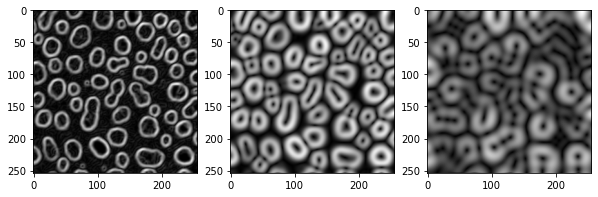

In [7]:
feature_stack = oclrfc.generate_feature_stack(image, "sobel_of_gaussian_blur=1 sobel_of_gaussian_blur=5 sobel_of_gaussian_blur=10")

visualize(feature_stack)

generated features:  ['gaussian_blur=1.0', 'laplace_box_of_gaussian_blur=1.0', 'gaussian_blur=5.0', 'laplace_box_of_gaussian_blur=5.0', 'gaussian_blur=10.0', 'laplace_box_of_gaussian_blur=10.0']


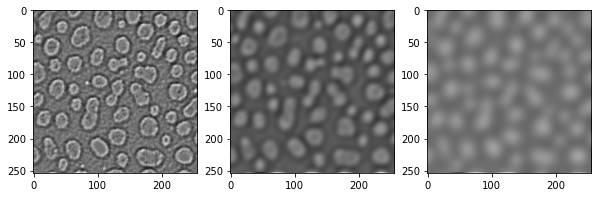

In [8]:
feature_stack = oclrfc.generate_feature_stack(image, "laplace_box_of_gaussian_blur=1 laplace_box_of_gaussian_blur=5 laplace_box_of_gaussian_blur=10")

visualize(feature_stack)